# Analyze Experimental Data

In [1]:
%load_ext autoreload
%autoreload 2

import sys

import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"

import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch


import default_config
from evaluate import get_model_immersion
from evaluate import compute_extrinsic_curvature
from evaluate import plot_curvature_profile

/Users/franciscoacosta/opt/anaconda3/envs/abn1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO: Using pytorch backend
INFO: NumExpr defaulting to 4 threads.


### Load Data

In [2]:
from datasets import utils

dataset_torch, labels, train_loader, test_loader = utils.load(default_config)


INFO: # - Found file at data/expt34_times_timestep1000000.txt! Loading...
INFO: # - Found file at data/expt34_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at data/expt34_labels_timestep1000000.txt! Loading...


data/expt34_times_timestep1000000.txt
      Unnamed: 0         times      angles  velocities  gains
0              0  3.625397e+08  125.815085   -0.104195    1.0
1              1  3.635397e+08  129.515412   13.455259    1.0
2              2  3.645397e+08  154.552048   30.988614    1.0
3              3  3.655397e+08  184.048601   27.353089    1.0
4              4  3.665397e+08  212.071814   28.240268    1.0
...          ...           ...         ...         ...    ...
2948        2948  3.310540e+09   37.660339    0.094720    1.0
2949        2949  3.311540e+09   38.190007    1.087265    1.0
2950        2950  3.312540e+09   38.595808   -1.100449    1.0
2951        2951  3.313540e+09   46.685671   16.660279    1.0
2952        2952  3.314540e+09   54.966355    1.060331    1.0

[2953 rows x 5 columns]
Dataset shape: (1473, 40).


### Load trained model & visualize latent space

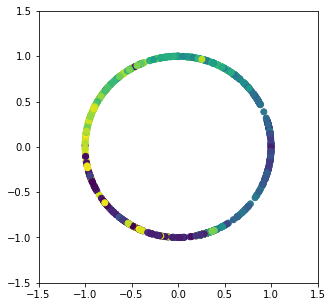

In [3]:
model_filename = "/Users/franciscoacosta/Desktop/code/neuralgeom/neuralgeom/results/trained_models/experimental_2022-09-09 03:47:00_model.pt"

model = torch.load(model_filename)

model.eval()


_, posterior_params = model(dataset_torch)

z, _, _ = model.reparameterize(posterior_params)


plt.figure(figsize=(5, 5))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

z0 = z[:, 0].cpu().detach().numpy()
z1 = z[:, 1].cpu().detach().numpy()

plt.scatter(z0, z1, c=labels["angles"])


### Visualize learned curvature

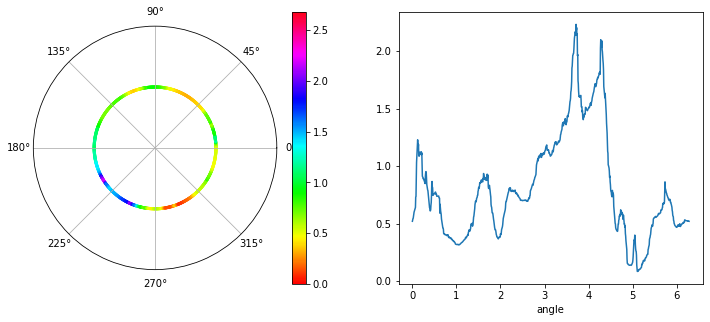

In [7]:
angles = gs.linspace(0, 2 * gs.pi, 1000)

immersion = get_model_immersion(model)

mean_curvature, mean_curvature_norm = compute_extrinsic_curvature(
    angles, immersion, dataset_torch.shape[1]
)

plot_curvature_profile(angles, mean_curvature_norm)
